In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [131]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Apr  6 14:36:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    48W / 400W |   2139MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
Df = pd.read_csv("/content/drive/MyDrive/Dataset/Airlines.csv")
Df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [134]:
print(Df.isnull().sum())

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64


In [135]:
Df.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [136]:
print(Df['Time'].value_counts())
print(min(Df['Time']))
print(max(Df['Time']))

360     10784
420      6644
390      4279
480      4058
450      3804
        ...  
1397        1
44          1
1387        1
359         1
37          1
Name: Time, Length: 1131, dtype: int64
10
1439


<Axes: xlabel='Delay', ylabel='count'>

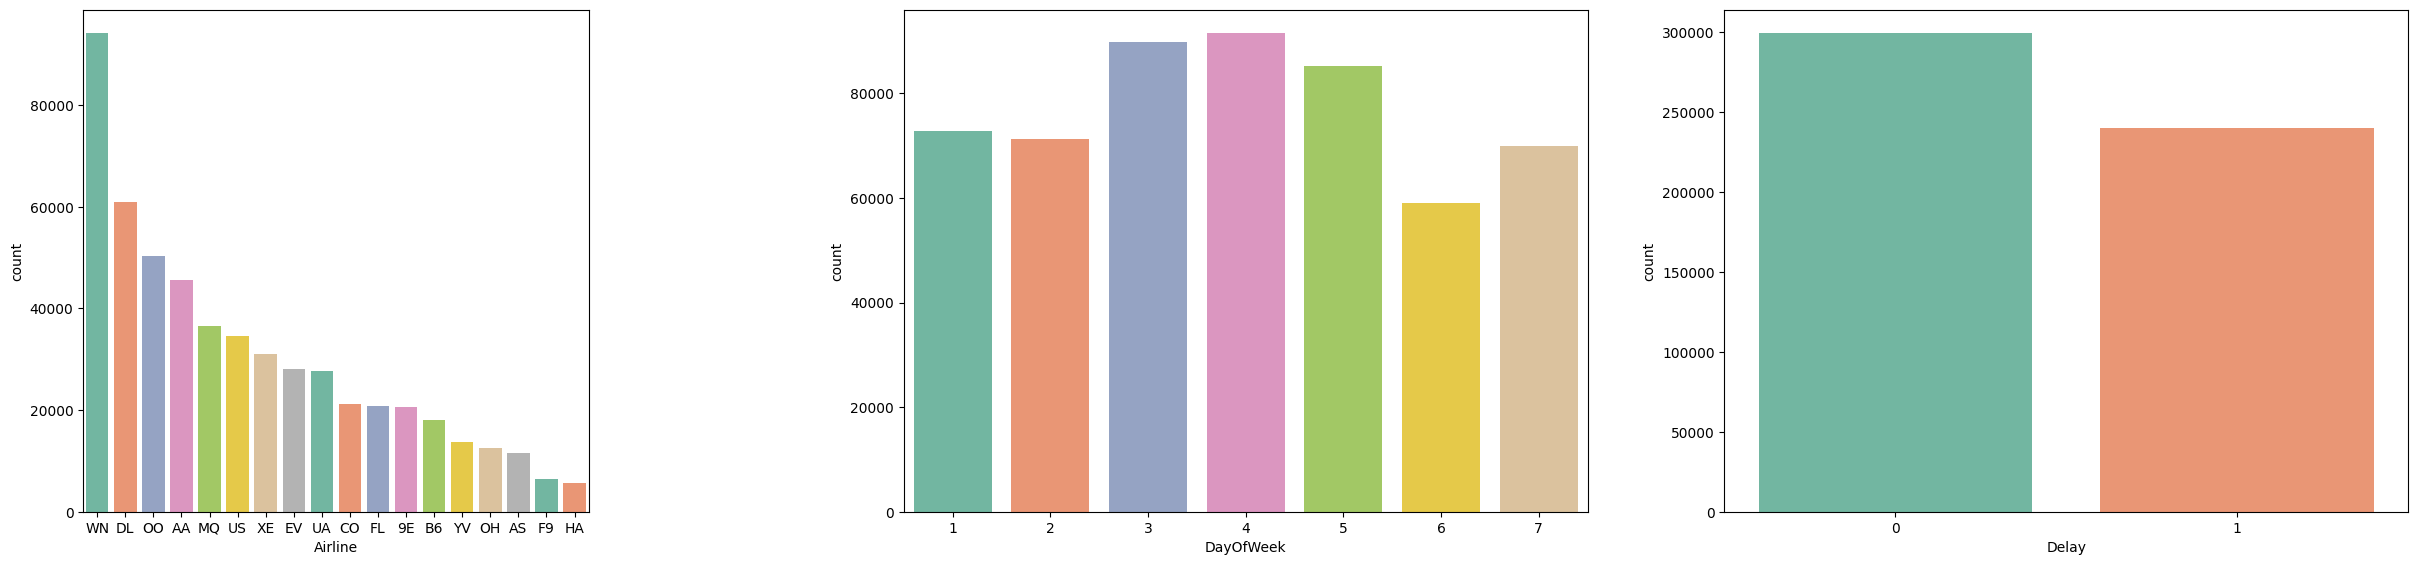

In [137]:
plt.figure(figsize=(30,30))
plt.subplot(4,4,1)
sns.countplot(x = 'Airline', palette='Set2', data = Df, order = Df['Airline'].value_counts().index)

plt.subplot(4,3,2)
sns.countplot(x = 'DayOfWeek', palette='Set2', data = Df)

plt.subplot(4,3,3)
sns.countplot(x = 'Delay', palette='Set2', data = Df)

In [138]:
# corr=Df.corr().round(2)
# plt.figure(figsize=(15,8))
# sns.heatmap(corr,annot=True)

In [139]:
#360-720 moringing ->1
#720-1080 afternoon ->2
#1080-1260 evening ->3
#0-360,1260-1440 night ->4
depature_time = []
for index,value in enumerate(Df['Time']):
    if 360<=value<720:
        depature_time.append(1)
    elif 720<=value<1080:
        depature_time.append(2)
    elif 1080<=value<1260:
        depature_time.append(3)
    else:
        depature_time.append(4)
Df['depature_time'] = depature_time

In [140]:
Df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,depature_time
0,1,CO,269,SFO,IAH,3,15,205,1,4
1,2,US,1558,PHX,CLT,3,15,222,1,4
2,3,AA,2400,LAX,DFW,3,20,165,1,4
3,4,AA,2466,SFO,DFW,3,20,195,1,4
4,5,AS,108,ANC,SEA,3,30,202,0,4
...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,4
539379,539380,FL,398,SEA,ATL,5,1439,305,0,4
539380,539381,FL,609,SFO,MKE,5,1439,255,0,4
539381,539382,UA,78,HNL,SFO,5,1439,313,1,4


In [141]:
Time_value_counts = Df['depature_time'].value_counts()
print(Time_value_counts)

1    218449
2    206930
3     83353
4     30651
Name: depature_time, dtype: int64


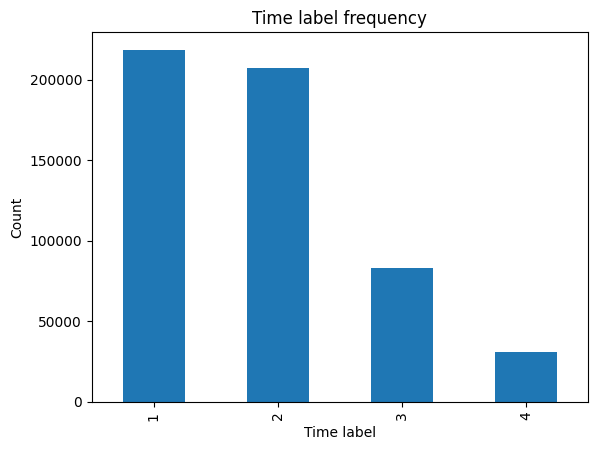

In [142]:
Time_value_counts.plot(kind='bar')

# Add labels and title to the chart
plt.xticks(rotation=90)
plt.xlabel('Time label')
plt.ylabel('Count')
plt.title('Time label frequency')

# Show the chart
plt.show()

In [143]:
holiday = []
for i in range(0,len(Df)):
    if ((Df['DayOfWeek'][i] == 6) | (Df['DayOfWeek'][i] == 7)):      
        holiday.append(1)
    else: 
        holiday.append(0)

Df['Holiday'] = holiday

In [144]:
Holiday_value_counts = Df['Holiday'].value_counts()
print(Holiday_value_counts)

0    410548
1    128835
Name: Holiday, dtype: int64


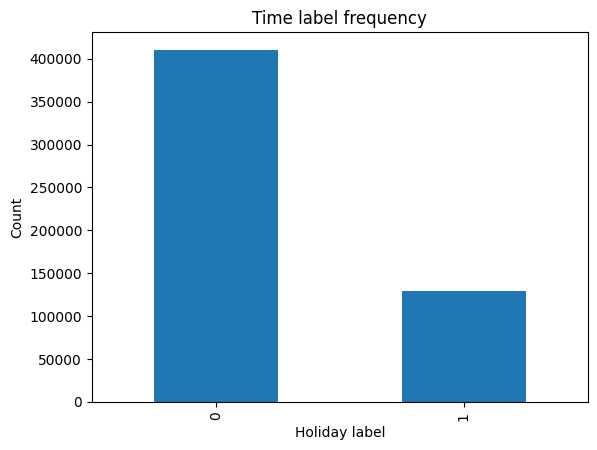

In [145]:
Holiday_value_counts.plot(kind='bar')

# Add labels and title to the chart
plt.xlabel('Holiday label')
plt.ylabel('Count')
plt.title('Time label frequency')

# Show the chart
plt.show()

In [146]:
print(Df['Length'].value_counts())
print(min(Df['Length']))
print(max(Df['Length']))
# Long
# Middle
# Short

80     13339
70     13086
65     11894
85     11840
75     11813
       ...  
481        2
418        2
457        2
417        2
23         1
Name: Length, Length: 426, dtype: int64
0
655


In [147]:
arrival_time = []
for i in range(0,len(Df)):     
    if ((Df['Time'][i] + Df['Length'][i]) >=1440):
        arrival_time.append((Df['Time'][i] + Df['Length'][i])-1440)
    else:
        arrival_time.append(Df['Time'][i] + Df['Length'][i])
        
# Df['Arrival_Time'] = arrival_time

In [148]:
# Df['Arrival_Time'].value_counts()
# print(min(Df['Arrival_Time']))
# print(max(Df['Arrival_Time']))

In [149]:
# arrival_time = []
# for i in range(0,len(Df)):
#     if ((Df['Arrival_Time'][i] >= 5) & (Df['Arrival_Time'][i] < 12)):      
#         arrival_time.append(0)
#     elif ((Df['Arrival_Time'][i] >= 12) & (Df['Arrival_Time'][i] < 17)):    
#         arrival_time.append(1)
#     elif ((Df['Arrival_Time'][i] >= 17) & (Df['Arrival_Time'][i] < 21)): 
#         arrival_time.append(2)
#     else: 
#         arrival_time.append(3)
        
# Df['arrival_time'] = arrival_time

In [150]:
print(Df['Airline'].nunique())

18


In [151]:
print(Df['AirportFrom'].nunique())

293


In [152]:
AirportFrom_counts = Df['AirportFrom'].value_counts()
AirportFrom_counts

ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportFrom, Length: 293, dtype: int64

In [153]:
# plt.figure(figsize=(10, 100))
# Df['AirportFrom'].value_counts().plot(kind='barh')
# plt.title('AirportFrom')
# plt.xlabel('Count')
# plt.ylabel('AirportFrom')
# plt.show()

In [154]:
print(Df['AirportTo'].nunique())

293


In [155]:
AirportTo_counts = Df['AirportTo'].value_counts()
AirportTo_counts

ATL    34440
ORD    24871
DFW    22153
DEN    19848
LAX    16656
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportTo, Length: 293, dtype: int64

In [156]:
# Df['AirportTo'] = Df['AirportTo'].replace(AirportTo_counts)
# Df['AirportTo']

In [157]:
# plt.figure(figsize=(10, 100))
# Df['AirportTo'].value_counts().plot(kind='barh')
# plt.title('AirportTo')
# plt.xlabel('Count')
# plt.ylabel('AirportTo')
# plt.show()

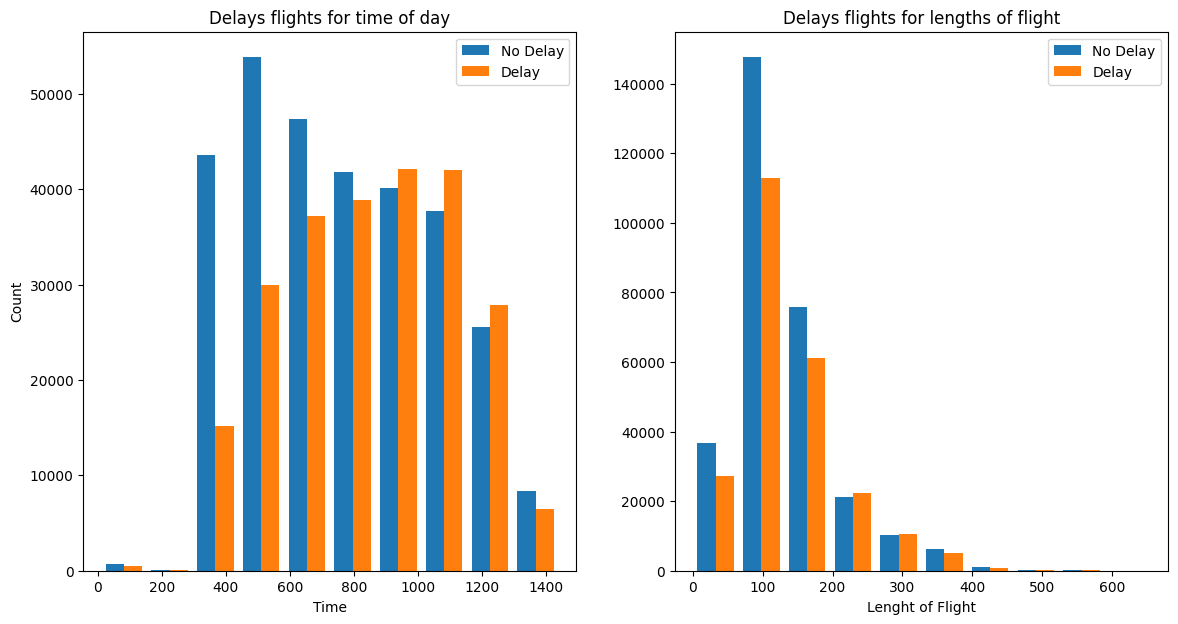

In [158]:

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist([Df["Time"][Df["Delay"] == 0], Df["Time"][Df["Delay"] == 1]], histtype='bar', label=["No Delay","Delay"])
ax1.set(xlabel="Time", ylabel="Count")
ax1.set_title("Delays flights for time of day")
ax1.legend()

ax2.hist([Df["Length"][Df["Delay"] == 0], Df["Length"][Df["Delay"] == 1]], histtype='bar', label=["No Delay","Delay"])
ax2.set(xlabel="Lenght of Flight")
ax2.set_title("Delays flights for lengths of flight")
ax2.legend()

fig.set_size_inches(14, 7)

In [159]:
Target = pd.DataFrame(Df['Delay'], columns=['Delay'])
# Target

In [160]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
Df['AirportFrom'] = LabelEncoder.fit_transform(Df['AirportFrom'])
Df['AirportTo'] = LabelEncoder.fit_transform(Df['AirportTo'])

In [161]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder()
one_hot = OneHotEncoder.fit_transform(Df[['Airline']])
one_hot_df = pd.DataFrame(one_hot.toarray(), columns=OneHotEncoder.get_feature_names_out(['Airline']))
data = Df.drop(['id','Airline', 'Delay'], axis=1)
Dataset = pd.concat([data, one_hot_df], axis=1)

Dataset

,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,depature_time,Holiday,Airline_9E,Airline_AA,...,Airline_FL,Airline_HA,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_WN,Airline_XE,Airline_YV
0,269,253,135,3,15,205,4,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1558,217,60,3,15,222,4,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2400,154,80,3,20,165,4,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2466,253,80,3,20,195,4,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,108,14,252,3,30,202,4,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,178,203,264,5,1439,326,4,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539379,398,252,16,5,1439,305,4,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539380,609,253,184,5,1439,255,4,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539381,78,128,253,5,1439,313,4,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [162]:
alpha = 0.05
for col in Dataset.columns:
    stat, p = shapiro(Dataset[col])
    if p > alpha:
        print(f'{col} is normally distributed')
    else:
        print(f'{col} is not normally distributed')
# 用minmax

/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Flight is not normally distributed
AirportFrom is not normally distributed
AirportTo is not normally distributed
DayOfWeek is not normally distributed
Time is not normally distributed
Length is not normally distributed
depature_time is not normally distributed
Holiday is not normally distributed
Airline_9E is not normally distributed
Airline_AA is not normally distributed
Airline_AS is not normally distributed
Airline_B6 is not normally distributed
Airline_CO is not normally distributed
Airline_DL is not normally distributed
Airline_EV is not normally distributed
Airline_F9 is not normally distributed
Airline_FL is not normally distributed
Airline_HA is not normally distributed
Airline_MQ is not normally distributed
Airline_OH is not normally distributed
Airline_OO is not normally distributed
Airline_UA is not normally distributed
Airline_US is not normally distributed
Airline_WN is not normally distributed
Airline_XE is not normally distributed
Airline_YV is not normally distributed


<Axes: >

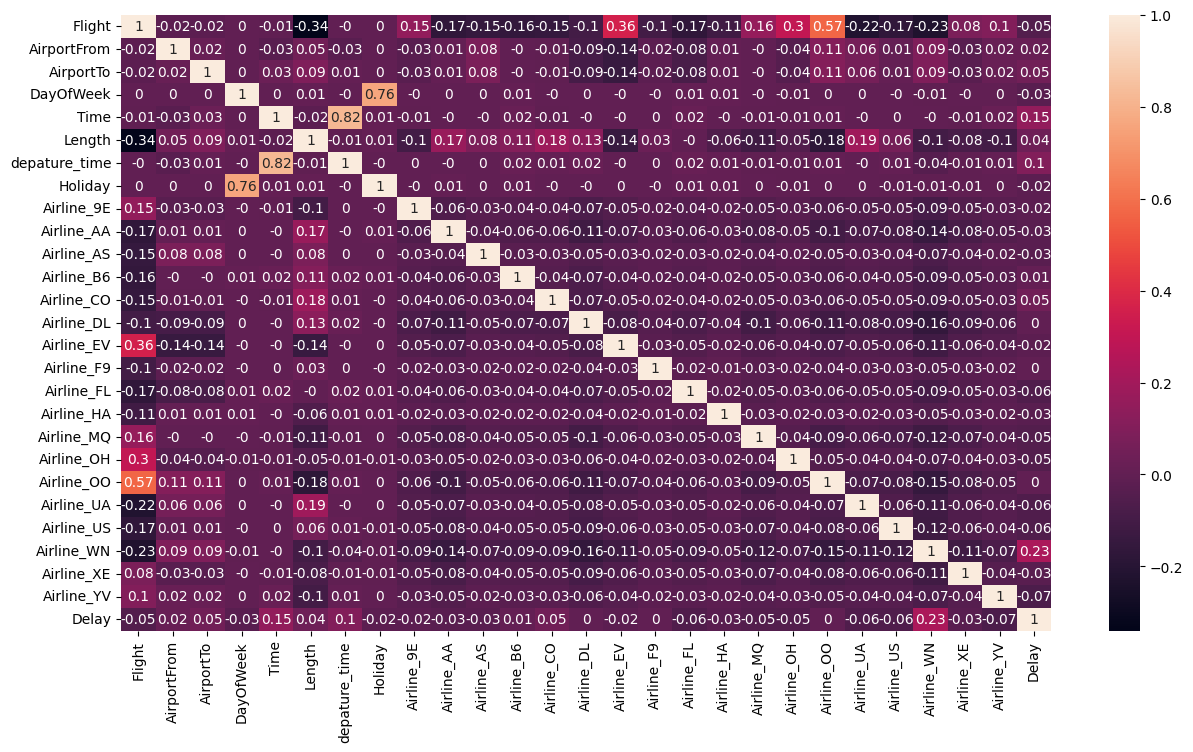

In [163]:
Dataset_corr = pd.concat([Dataset, Target], axis=1)
corr=Dataset_corr.corr().round(2)
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)
# 数据属性之间没有线性关系？
# 存在非线性关系？

In [164]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(Dataset)
# X = pd.DataFrame(X)
scaler = StandardScaler()
X = scaler.fit_transform(Dataset)
X = pd.DataFrame(X)

In [165]:
y = Target

In [166]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1, shuffle = False)

In [167]:
# print(np.ravel(y_train))

In [168]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [169]:
# RandomForest = RandomForestClassifier()
# RandomForest_estimators = list(range(100,150))
# RandomForest_max_depth = list(range(5,20))
# RandomForest_values = dict(n_estimators = RandomForest_estimators, max_depth = RandomForest_max_depth)

# RandomForest_grid = GridSearchCV(RandomForest, RandomForest_values, cv = 5, scoring = 'accuracy')
# RandomForest_grid.fit(X_train, np.ravel(y_train))
# print("Best: %f using %s" % (RandomForest_grid.best_score_, RandomForest_grid.best_params_))
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f'Fold {i+1}')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = RandomForestClassifier(n_estimators=120, max_depth=17).fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
    print("Precision: {:.3f}".format(precision_score(y_test, pred)))
    print("Recall: {:.3f}".format(recall_score(y_test, pred)))

    report = classification_report(y_test, pred)
    print(report)

Fold 1
Accuracy: 0.663
Precision: 0.673
Recall: 0.472
              precision    recall  f1-score   support

           0       0.66      0.82      0.73     59879
           1       0.67      0.47      0.55     47998

    accuracy                           0.66    107877
   macro avg       0.67      0.64      0.64    107877
weighted avg       0.66      0.66      0.65    107877

Fold 2
Accuracy: 0.661
Precision: 0.673
Recall: 0.464
              precision    recall  f1-score   support

           0       0.66      0.82      0.73     59917
           1       0.67      0.46      0.55     47960

    accuracy                           0.66    107877
   macro avg       0.66      0.64      0.64    107877
weighted avg       0.66      0.66      0.65    107877

Fold 3
Accuracy: 0.663
Precision: 0.676
Recall: 0.470
              precision    recall  f1-score   support

           0       0.66      0.82      0.73     59753
           1       0.68      0.47      0.55     48124

    accuracy        

In [170]:
columns = Dataset.iloc[:, :].columns
columns
feature_imp = pd.Series(model.feature_importances_, index = columns).sort_values(ascending = False)
threshold = 0.01
selected_features = feature_imp[feature_imp > threshold]
selected_features

Airline_WN       0.199959
Time             0.180807
Flight           0.109249
Length           0.107979
DayOfWeek        0.095086
AirportFrom      0.076579
AirportTo        0.071036
depature_time    0.050977
Airline_CO       0.014087
Airline_YV       0.013028
Holiday          0.010896
Airline_FL       0.010111
Airline_UA       0.010022
dtype: float64

In [171]:
# DecisionTree = DecisionTreeClassifier()
# DecisionTree_max_depth = list(range(5,10))
# DecisionTree_min_samples_split = list(range(2,10))
# DecisionTree_min_samples_leaf = list(range(1,50))

# DecisionTree_values = dict(max_depth = DecisionTree_max_depth, min_samples_split = DecisionTree_min_samples_split, min_samples_leaf = DecisionTree_min_samples_leaf)
# DecisionTree_grid = GridSearchCV(DecisionTree, DecisionTree_values, cv = 5, scoring = 'accuracy')
# DecisionTree_grid.fit(X_train, np.ravel(y_train))
# print("Best: %f using %s" % (DecisionTree_grid.best_score_, DecisionTree_grid.best_params_))

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f'Fold {i+1}')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
    print("Precision: {:.3f}".format(precision_score(y_test, pred)))
    print("Recall: {:.3f}".format(recall_score(y_test, pred)))
    report = classification_report(y_test, pred)
    print(report)

Fold 1
Accuracy: 0.639
Precision: 0.686
Recall: 0.348
              precision    recall  f1-score   support

           0       0.63      0.87      0.73     59879
           1       0.69      0.35      0.46     47998

    accuracy                           0.64    107877
   macro avg       0.66      0.61      0.59    107877
weighted avg       0.65      0.64      0.61    107877

Fold 2
Accuracy: 0.637
Precision: 0.688
Recall: 0.338
              precision    recall  f1-score   support

           0       0.62      0.88      0.73     59917
           1       0.69      0.34      0.45     47960

    accuracy                           0.64    107877
   macro avg       0.66      0.61      0.59    107877
weighted avg       0.65      0.64      0.61    107877

Fold 3
Accuracy: 0.637
Precision: 0.685
Recall: 0.346
              precision    recall  f1-score   support

           0       0.62      0.87      0.73     59753
           1       0.69      0.35      0.46     48124

    accuracy        

In [129]:
import tensorflow as tf

# DecisionTree = DecisionTreeClassifier()
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     tf.keras.layers.Dense(hidden_neurons, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# DecisionTree_max_depth = list(range(5,10))
# DecisionTree_min_samples_split = list(range(2,10))
# DecisionTree_min_samples_leaf = list(range(1,50))

# DecisionTree_values = dict(max_depth = DecisionTree_max_depth, min_samples_split = DecisionTree_min_samples_split, min_samples_leaf = DecisionTree_min_samples_leaf)
# DecisionTree_grid = GridSearchCV(DecisionTree, DecisionTree_values, cv = 5, scoring = 'accuracy')
# DecisionTree_grid.fit(X_train, np.ravel(y_train))
# print("Best: %f using %s" % (DecisionTree_grid.best_score_, DecisionTree_grid.best_params_))

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f'Fold {i+1}')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10)
    y_probabilities = model.predict(X_test)
    y_predictions = np.where(y_probabilities > 0.5, 1, 0)
    print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_predictions)))
    print("Precision: {:.3f}".format(precision_score(y_test, y_predictions)))
    print("Recall: {:.3f}".format(recall_score(y_test, y_predictions)))
#     # report = classification_report(y_test, y_predictions)
#     # print(report)

Fold 1
Epoch 1/10
13485/13485 [==============================] - 39s 3ms/step - loss: 0.6318 - accuracy: 0.6398
Epoch 2/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6288 - accuracy: 0.6425
Epoch 3/10
13485/13485 [==============================] - 37s 3ms/step - loss: 0.6279 - accuracy: 0.6440
Epoch 4/10
13485/13485 [==============================] - 37s 3ms/step - loss: 0.6271 - accuracy: 0.6446
Epoch 5/10
13485/13485 [==============================] - 37s 3ms/step - loss: 0.6267 - accuracy: 0.6451
Epoch 6/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6262 - accuracy: 0.6460
Epoch 7/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6258 - accuracy: 0.6462
Epoch 8/10
13485/13485 [==============================] - 39s 3ms/step - loss: 0.6254 - accuracy: 0.6466
Epoch 9/10
13485/13485 [==============================] - 37s 3ms/step - loss: 0.6250 - accuracy: 0.6471
Epoch 10/10
3372/3372 [=========================

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f'Fold {i+1}')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10)
    # Extract the features from the trained neural network
    train_features = model.predict(X_train)
    rf = RandomForestClassifier(n_estimators=120, max_depth=17)
    rf.fit(train_features, y_train)
    test_features = model.predict(X_test)
    rf_predictions = rf.predict(test_features)
    print("Accuracy: {:.3f}".format(accuracy_score(y_test, rf_predictions)))
    print("Precision: {:.3f}".format(precision_score(y_test, rf_predictions)))
    print("Recall: {:.3f}".format(recall_score(y_test, rf_predictions)))
    # report = classification_report(y_test, rf_predictions)
    # print(report)

Fold 1
Epoch 1/10
13485/13485 [==============================] - 40s 3ms/step - loss: 0.6313 - accuracy: 0.6407
Epoch 2/10
13485/13485 [==============================] - 39s 3ms/step - loss: 0.6285 - accuracy: 0.6436
Epoch 3/10
13485/13485 [==============================] - 39s 3ms/step - loss: 0.6273 - accuracy: 0.6451
Epoch 4/10
13485/13485 [==============================] - 39s 3ms/step - loss: 0.6263 - accuracy: 0.6461
Epoch 5/10
13485/13485 [==============================] - 39s 3ms/step - loss: 0.6257 - accuracy: 0.6476
Epoch 6/10
13485/13485 [==============================] - 39s 3ms/step - loss: 0.6250 - accuracy: 0.6476
Epoch 7/10
13485/13485 [==============================] - 39s 3ms/step - loss: 0.6244 - accuracy: 0.6488
Epoch 8/10
13485/13485 [==============================] - 39s 3ms/step - loss: 0.6240 - accuracy: 0.6495
Epoch 9/10
13485/13485 [==============================] - 39s 3ms/step - loss: 0.6235 - accuracy: 0.6504
Epoch 10/10
13485/13485 [=======================

<ipython-input-172-452830b197d8>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_features, y_train)


3372/3372 [==============================] - 5s 1ms/step
Accuracy: 0.651
Precision: 0.652
Recall: 0.462
Fold 2
Epoch 1/10
13485/13485 [==============================] - 43s 3ms/step - loss: 0.6315 - accuracy: 0.6400
Epoch 2/10
13485/13485 [==============================] - 40s 3ms/step - loss: 0.6280 - accuracy: 0.6435
Epoch 3/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6266 - accuracy: 0.6452
Epoch 4/10
13485/13485 [==============================] - 39s 3ms/step - loss: 0.6256 - accuracy: 0.6465
Epoch 5/10
13485/13485 [==============================] - 39s 3ms/step - loss: 0.6250 - accuracy: 0.6474
Epoch 6/10
13485/13485 [==============================] - 40s 3ms/step - loss: 0.6242 - accuracy: 0.6479
Epoch 7/10
13485/13485 [==============================] - 40s 3ms/step - loss: 0.6238 - accuracy: 0.6485
Epoch 8/10
13485/13485 [==============================] - 40s 3ms/step - loss: 0.6232 - accuracy: 0.6500
Epoch 9/10
13485/13485 [=========================

<ipython-input-172-452830b197d8>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_features, y_train)


3372/3372 [==============================] - 4s 1ms/step
Accuracy: 0.649
Precision: 0.649
Recall: 0.460
Fold 3
Epoch 1/10
13485/13485 [==============================] - 40s 3ms/step - loss: 0.6306 - accuracy: 0.6410
Epoch 2/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6276 - accuracy: 0.6442
Epoch 3/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6264 - accuracy: 0.6461
Epoch 4/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6255 - accuracy: 0.6470
Epoch 5/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6249 - accuracy: 0.6478
Epoch 6/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6242 - accuracy: 0.6486
Epoch 7/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6236 - accuracy: 0.6489
Epoch 8/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6233 - accuracy: 0.6497
Epoch 9/10
13485/13485 [=========================

<ipython-input-172-452830b197d8>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_features, y_train)


3372/3372 [==============================] - 4s 1ms/step
Accuracy: 0.647
Precision: 0.649
Recall: 0.452
Fold 4
Epoch 1/10
13485/13485 [==============================] - 40s 3ms/step - loss: 0.6311 - accuracy: 0.6400
Epoch 2/10
13485/13485 [==============================] - 39s 3ms/step - loss: 0.6281 - accuracy: 0.6436
Epoch 3/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6268 - accuracy: 0.6452
Epoch 4/10
13485/13485 [==============================] - 39s 3ms/step - loss: 0.6259 - accuracy: 0.6460
Epoch 5/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6252 - accuracy: 0.6474
Epoch 6/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6245 - accuracy: 0.6482
Epoch 7/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6238 - accuracy: 0.6489
Epoch 8/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6234 - accuracy: 0.6495
Epoch 9/10
13485/13485 [=========================

<ipython-input-172-452830b197d8>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_features, y_train)


3372/3372 [==============================] - 4s 1ms/step
Accuracy: 0.650
Precision: 0.649
Recall: 0.470
Fold 5
Epoch 1/10
13485/13485 [==============================] - 39s 3ms/step - loss: 0.6311 - accuracy: 0.6406
Epoch 2/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6285 - accuracy: 0.6434
Epoch 3/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6272 - accuracy: 0.6445
Epoch 4/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6264 - accuracy: 0.6461
Epoch 5/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6257 - accuracy: 0.6468
Epoch 6/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6250 - accuracy: 0.6478
Epoch 7/10
13485/13485 [==============================] - 39s 3ms/step - loss: 0.6245 - accuracy: 0.6483
Epoch 8/10
13485/13485 [==============================] - 38s 3ms/step - loss: 0.6239 - accuracy: 0.6498
Epoch 9/10
13485/13485 [=========================

<ipython-input-172-452830b197d8>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_features, y_train)


3372/3372 [==============================] - 4s 1ms/step
Accuracy: 0.650
Precision: 0.653
Recall: 0.458
